In [1]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Load in the data
# MNIST Dataset containing handwritten digits

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape: ", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [3]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
# Model building
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4953 - accuracy: 0.7520 - val_loss: 0.4951 - val_accuracy: 0.8809
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5815 - accuracy: 0.8456 - val_loss: 0.3736 - val_accuracy: 0.9119
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4769 - accuracy: 0.8714 - val_loss: 0.3113 - val_accuracy: 0.9254
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4191 - accuracy: 0.8893 - val_loss: 0.3279 - val_accuracy: 0.9260
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3832 - accuracy: 0.8969 - val_loss: 0.2927 - val_accuracy: 0.9383
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.9010 - val_loss: 0.2971 - val_accuracy: 0.9359
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.9066 - val_loss: 0.3075 - val_accuracy:

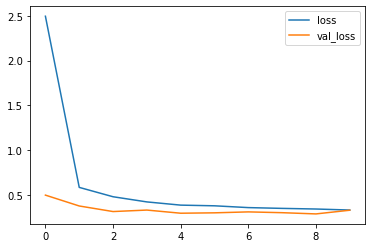

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

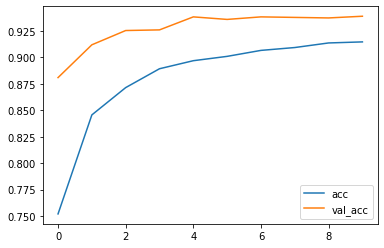

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.9389
[0.32624557614326477, 0.9388999938964844]


Confusion matrix, without normalization
[[ 909    0    3    0    0    1   50    1   16    0]
 [   0 1108    5    1    0    2    1    0   18    0]
 [   3    1  984    2    4    0    4    9   25    0]
 [   1    0   28  934    0    5    0    7   32    3]
 [   0    0    4    0  919    0    8    0   20   31]
 [   2    1    1   14    7  821    7    1   33    5]
 [   1    3    0    0    8   20  906    0   20    0]
 [   1    4   33    3    3    0    0  964   12    8]
 [   2    2   10    0    8    6    3    1  939    3]
 [   2    7    0    8   30    6    3    7   41  905]]


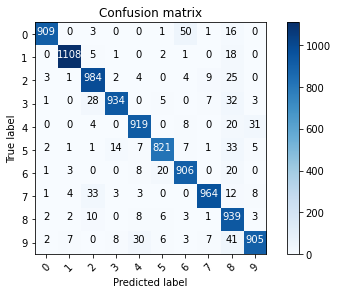

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

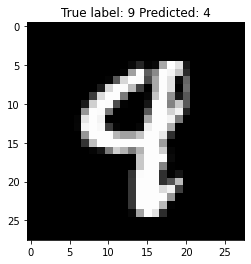

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));